In [29]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
#Trend Observations:
#1. From the cities provided, the demographic for each graph
# favors "Urban" for all data types.
#2. Average fares were exponentially higher through the Rural areas, 
# can be influenced by the low availability of drivers.
#3. Pyber Driving (based on data) is clearly a highly used mode of transportation.  With this in mind,
# along with the combination of most drivers and riders, but lowest fares, we should run promotional
# events to help drive fare rates up, while maintaining high number of drives (ex. Sporting events, like
# Superbowl, World Series, Concerts, etc.)

In [31]:
#read csv
csv_path_1 = ("Resources/city_data.csv")
csv_path_2 = ("Resources/ride_data.csv")
city_data_df = pd.read_csv(csv_path_1)
ride_data_df = pd.read_csv(csv_path_2)
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [32]:
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [33]:
#Merging of both Files
merge_data = pd.merge(city_data_df, ride_data_df, on=("city", "city"), how="left")
merge_data.sort_values("type").head()

,city,driver_count,type,date,fare,ride_id
2406,West Kevintown,5,Rural,2016-02-10 00:50:04,34.69,9595491362610
2314,Jacksonfort,6,Rural,2016-11-15 18:10:42,34.73,2872259802463
2315,Jacksonfort,6,Rural,2016-06-09 23:01:40,24.63,978305304720
2316,Jacksonfort,6,Rural,2016-10-01 13:41:00,34.17,7750597960630
2317,Jacksonfort,6,Rural,2016-10-20 16:42:54,37.75,4356781814784


In [35]:
#Dataframe of Groupings of Cities
cityGroup_df = pd.DataFrame(merge_data.groupby(["city"]).size())
cityGroup_df.head()

,0
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19


In [36]:
# totalDrivers = merge_data.groupby(["city"])["driver_count"].sum()
# totalDrivers.head()


In [37]:
#Building a Bubble Plot:
#Key Variables: 
#Average Fare ($) Per City
avgFare = round(merge_data.groupby(["city"]).mean()["fare"], 2)
# avgFare.drop(avgFare.columns[[0,2]], axis=1, inplace=True)
avgFare.head()
#Total number of Rides per City
totalRides = merge_data.groupby(["city"]).count()["ride_id"]
# totalRides.drop(totalRides.columns[[0,1,2,3]], axis=1, inplace=True)
totalRides.head()
#Total number of Drivers per City
totalDrivers = merge_data.groupby(["city"]).mean()["driver_count"]
# totalDrivers.drop(totalDrivers.columns[[1,2]], axis=1, inplace=True)
totalDrivers
# #City Types (Rural, Suburban, etc.)

# cityTypes = merge_data.groupby(["type"])
# cityTypes.count()
#Include Plot Titles, Axes Lablels, Legeld Labels
#Include Wedge Percentages, Wedge Labels
#Include alpha, edgecolor, linewidths
#Stick to (Gold, Light Sky Blue, and Light Coral) 

city
Alvarezhaven            21.0
Alyssaberg              67.0
Anitamouth              16.0
Antoniomouth            21.0
Aprilchester            49.0
Arnoldview              41.0
Campbellport            26.0
Carrollbury              4.0
Carrollfort             55.0
Clarkstad               21.0
Conwaymouth             18.0
Davidtown               73.0
Davistown               25.0
East Cherylfurt          9.0
East Douglas            12.0
East Erin               43.0
East Jenniferchester    22.0
East Leslie              9.0
East Stephen             6.0
East Troybury            3.0
Edwardsbury             11.0
Erikport                 3.0
Eriktown                15.0
Floresberg               7.0
Fosterside              69.0
Hernandezshire          10.0
Horneland                8.0
Jacksonfort              6.0
Jacobfort               52.0
Jasonfort               25.0
                        ... 
South Roy               35.0
South Shannonborough     9.0
Spencertown             68.0
Stevenspo

In [38]:
#City analysis table:
cityanalysis = pd.DataFrame({"Average Fare": avgFare,
                             "Riders per City": totalRides,
                             "Drivers per City": totalDrivers},
                           )
cityanalysis

,Average Fare,Drivers per City,Riders per City
city,,,
Alvarezhaven,23.93,21.0,31
Alyssaberg,20.61,67.0,26
Anitamouth,37.32,16.0,9
Antoniomouth,23.62,21.0,22
Aprilchester,21.98,49.0,19
Arnoldview,25.11,41.0,31
Campbellport,33.71,26.0,15
Carrollbury,36.61,4.0,10
Carrollfort,25.40,55.0,29


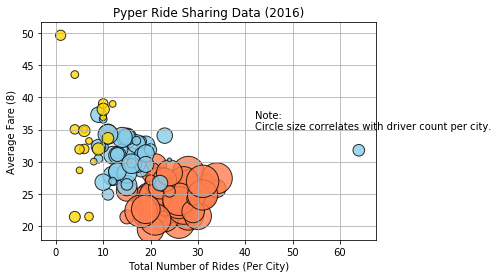

In [39]:
#Bubble Plot
urban_cities = merge_data[merge_data["type"] == "Urban"]
suburban_cities = merge_data[merge_data["type"] == "Suburban"]
rural_cities = merge_data[merge_data["type"] == "Rural"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_drive_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_drive_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_drive_count = rural_cities.groupby(["city"]).mean()["driver_count"]

plt.scatter(x=urban_ride_count,
           y=urban_avg_fare,
            s=15*urban_drive_count, 
            facecolors="coral",
            edgecolor="black", 
            linewidth=1, 
            marker='o',
            alpha=0.8) 
#             label="Urban")

plt.scatter(x=suburban_ride_count,
           y=suburban_avg_fare,
            s=15*suburban_drive_count, 
            facecolors="skyblue",
            edgecolor="black", 
            linewidth=1, 
            marker='o',
            alpha=0.8) 
#             label="Suburban")

plt.scatter(x=rural_ride_count,
           y=rural_avg_fare,
            s=15*rural_drive_count, 
            facecolors="gold",
            edgecolor="black", 
            linewidth=1, 
            marker='o',
            alpha=0.8) 
#             label="Rural")

#Scatter Properties
plt.title("Pyper Ride Sharing Data (2016)")
plt.ylabel("Average Fare (8)")
plt.xlabel("Total Number of Rides (Per City)")
# plt.xlim((0,40))

#Create a Legend
# lgn = plt.legend(fontsize='small', mode='Expanded', 
#                 numpoints=1, scatterpoints=1,
#                 loc="beat", title="City Types",
#                 labelspacing=0.5)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# lgnd.legendHandles[2]._sizes = [30]

plt.text(42,35,"Note:\nCircle size correlates with driver count per city.")

# plt.savefig("analysis/Fig.png")
plt.grid()
plt.show()


In [41]:
fareTotal = merge_data.groupby(["type"]).sum()
fareTotal
fareTotal.loc["Total Fare"] = merge_data["fare"].sum()
fareTotal.iloc[[-1]]
fareTotal.drop(fareTotal.columns[[0,2]], axis=1, inplace=True)
fareTotal
FARES = fareTotal.tail(n=1)
FARES
fareTotal



,fare
type,
Rural,4255.09
Suburban,20335.69
Urban,40078.34
Total Fare,64669.12


In [59]:
#Build a Pie Chart:
#Percent of Total Fares by City Type
ruralFPerc = round((fareTotal.iloc[0]/fareTotal.iloc[3]) * 100, 2)
# merge_data.groupby("type")["fare"].agg(["sum", "count"])
print(ruralFPerc)
suburbanFPerc =round((fareTotal.iloc[1]/fareTotal.iloc[3]) * 100, 2)
print(suburbanFPerc)
urbanFPerc = round((fareTotal.iloc[2]/fareTotal.iloc[3]) * 100, 2)
print(urbanFPerc)
percentsDF = pd.DataFrame({"Rural Percent": ruralFPerc,
                          "Urban Percent": urbanFPerc,
                          "Suburban Percent": suburbanFPerc},
                          )


percentsDF
#piechart
# Labels for the sections of our pie chart
lbls = ["Rural", "Urban", "Suburban"]

# The values of each section of the pie chart
sizes = [ruralFPerc, urbanFPerc, suburbanFPerc]

# The colors of each section of the pie chart
colors = ["gold", "coral", "skyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.0, 0.1, 0.0)


fare    6.58
dtype: float64
fare    31.45
dtype: float64
fare    61.97
dtype: float64


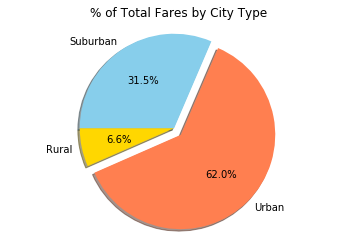

In [60]:
# Create Pie Chart Based on values above
#plt.pie(sizes, explode=explode, labels=labels, 
#        colors = colors, autopct="%1.1f%%", 
#        shadow=True, startangle=140)#rotatelabels=True

plt.pie(sizes,
        labels=lbls, 
        colors = colors, 
        autopct = "%1.1f%%", 
        shadow=True, 
        startangle=180,
        explode = explode)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()

ride_id    5.19
dtype: float64
ride_id    27.3
dtype: float64
ride_id    67.51
dtype: float64


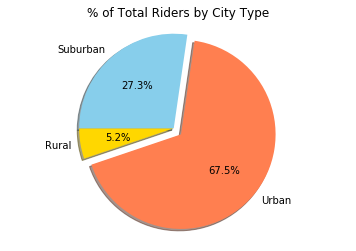

In [63]:
#Percent of Total Rides by City Type

rideTotal = merge_data.groupby(["type"]).count()
rideTotal
rideTotal.loc["Total Rides"] = rideTotal["ride_id"].sum()
rideTotal.iloc[[-1]]
rideTotal.drop(rideTotal.columns[[0,1,2,3]], axis=1, inplace=True)
rideTotal
RIDES = rideTotal.tail(n=1)
RIDES
rideTotal
#Percent of Total Drivers by City Type
ruralRides = round((rideTotal.iloc[0]/rideTotal.iloc[3]) * 100, 2)
# merge_data.groupby("type")["fare"].agg(["sum", "count"])
print(ruralRides)
suburbanRides =round((rideTotal.iloc[1]/rideTotal.iloc[3]) * 100, 2)
print(suburbanRides)
urbanRides = round((rideTotal.iloc[2]/rideTotal.iloc[3]) * 100, 2)
print(urbanRides)
cityDF = pd.DataFrame({"Rural Ride Percent": ruralRides,
                          "Urban Ride Percent": urbanRides,
                          "Suburban Ride Percent": suburbanRides},
                          )
cityDF
#piechart
# Labels for the sections of our pie chart
lbls = ["Rural", "Urban", "Suburban"]

# The values of each section of the pie chart
sizes = [ruralRides, urbanRides, suburbanRides]

# The colors of each section of the pie chart
colors = ["gold", "coral", "skyblue"]

explode = (0.0, 0.1, 0.0)
# Tells matplotlib to seperate the "Python" section from the others
plt.pie(sizes,
        labels=lbls, 
        colors = colors, 
        autopct = "%1.1f%%", 
        shadow=True, 
        startangle=180,
        explode = explode)
plt.title("% of Total Riders by City Type")
plt.axis("equal")
plt.show()

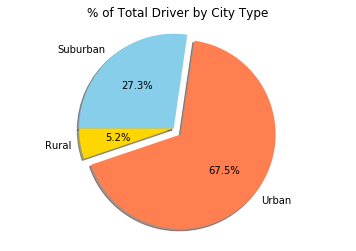

In [68]:
#Percent of Total Drivers by City Type
# totalDrivers = merge_data.groupby(["city"]).mean()["driver_count"]
# # totalDrivers.drop(totalDrivers.columns[[1,2]], axis=1, inplace=True)
# totalDrivers

driveTotal = pd.DataFrame(merge_data.groupby(["city","type","driver_count"]).sum())
driveTotal.reset_index(inplace=True)
driveTotal= pd.DataFrame(driveTotal.groupby("type").sum())
driveTotal
driveTotal.loc["Total Drivers"] = driveTotal["driver_count"].sum()
driveTotal.iloc[[-1]]
driveTotal.drop(driveTotal.columns[[1,2]], axis=1, inplace=True)
driveTotal
DRIVE = driveTotal.tail(n=1)
DRIVE
driverDF = pd.DataFrame({"Rural Driver Percent": driveTotal.loc["Rural"],
                          "Urban Driver Percent": driveTotal.loc["Urban"],
                          "Suburban Driver Percent": driveTotal.loc["Suburban"]},
                          )
driverDF
#piechart
# Labels for the sections of our pie chart
lbls = ["Rural", "Urban", "Suburban"]

# The values of each section of the pie chart
size = [driveTotal.loc["Rural"], driveTotal.loc["Urban"], driveTotal.loc["Suburban"]]

# The colors of each section of the pie chart
colors = ["gold", "coral", "skyblue"]

explode = (0.0, 0.1, 0.0)
# Tells matplotlib to seperate the "Python" section from the others
plt.pie(sizes,
        labels=lbls, 
        colors = colors, 
        autopct = "%1.1f%%", 
        shadow=True, 
        startangle=180,
        explode = explode)
plt.title("% of Total Driver by City Type")
plt.axis("equal")
plt.show()
# driveTotal.loc["Total Driving"] = driveTotal["driver_count"].sum()
# driveTotal
# driveTotal.iloc[[-1]]
# driveTotal.drop(driveTotal.columns[[1,2]], axis=1, inplace=True)
# driveTotal


# DRIVE = driveTotal.tail(n=1)
# DRIVE
# driveTotal
# #Percent of Total Drivers by City Type
# ruralDrive = round((rideTotal.iloc[0]/driveTotal.iloc[3]) * 100, 2)
# # merge_data.groupby("type")["fare"].agg(["sum", "count"])
# print(ruralDrive)
# suburbanDrive =round((driveTotal.iloc[1]/driveTotal.iloc[3]) * 100, 2)
# print(suburbanDrive)
# urbanDrive = round((driveTotal.iloc[2]/driveTotal.iloc[3]) * 100, 2)
# print(urbanDrive)
# driveDF = pd.DataFrame({"Rural Percent": ruralDrive,
#                           "Urban Percent": urbanDrive,
#                           "Suburban Percent": suburbanDrive},
#                           )
# driveDF

In [66]:
#Failed Practices
# # Build a Pie Chart:
# # Percent of Total Fares by City Type


# typeFares = len(piePercents)
# typeFares
# typeFarePerc = typeFares / piePercents
# typeFarePerc * 100
# ruralFares = len(merge_data.loc[merge_data["type"]=="Rural"])
# rFares = float(ruralFares)
# ruralFarePerc = round((rFares/FARES) * 100, 2)
# ruralFarePerc
# urbanFares = len(merge_data.loc[merge_data["type"]=="Urban"])
# uFares = float(urbanFares)
# uFares
# urbanFarePerc =round((uFares/FARES), 2)
# urbanFarePerc
# suburbanFares = len(merge_data.loc[merge_data["type"]=="Suburban"])
# sFares= float(suburbanFares)
# suburbanFarePerc = round((sFares/FARES), 2)
# suburbanFarePerc
# #Percent of Total Rides by City Type

# #Percent of Total Drivers by City Type
# #Inclue Plot Titles, Axes Lablels, Legeld Labels
# #Include Wedge Percentages, Wedge Labels
# #Include shadow, startangle, explosion
# #Stick to (Gold, Light Sky Blue, and Light Coral) 
# percentsDF = pd.DataFrame({"R Perc": ruralFarePerc,
#                           "U Perc": urbanFarePerc,
#                           "S Perc": suburbanFarePerc},
#                           index=["type"])
# percentsDF

# # urbanFarePerc ="{0:.2f}%".format(round((FARES/uFares), 2))
# # urbanFarePerc
# urbanFares = len(merge_data.loc[merge_data["type"]=="Urban", "fare"])
# uFares = float(urbanFares)
# uFares